# 3.1 Preprocessing (1 point)
(a) Load the dataset pca2.csv. Compute the Principal Components PC1 and PC2 and plot
the data in the coordinate system PC1 vs. PC2 – What do you observe?


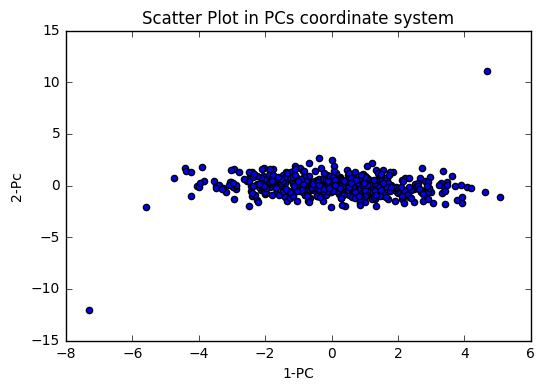

In [28]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
%matplotlib inline

pca2 = genfromtxt('pca2.csv', delimiter=',', skip_header=True,dtype='float')
def PCA(X):
    mean=np.mean(X,axis=0)
    centered=X-mean
    cov=np.cov(centered.T)
    eigVals,eigVects=np.linalg.eig(cov)
    return np.dot(centered, eigVects)
    
project=PCA(pca2)
plt.scatter(project[:, 0], project[:, 1])
plt.xlabel('1-PC')
plt.ylabel('2-Pc')
plt.title('Scatter Plot in PCs coordinate system')

(b) Remove Observations 17 and 157 and redo the first two steps. What is the difference?


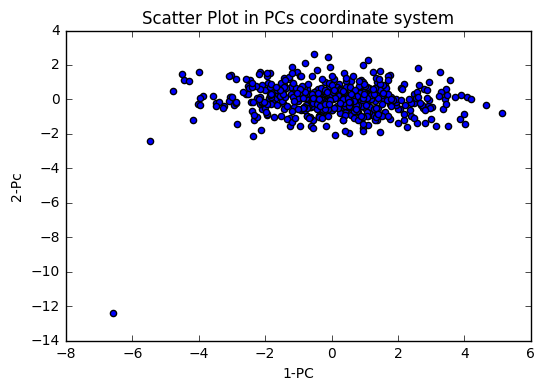

In [34]:
pca2 = np.delete(pca2, (16), axis=0)
pca2 = np.delete(pca2, (156), axis=0)
project=PCA(pca2)
plt.scatter(project[:, 0], project[:, 1])
plt.xlabel('1-PC')
plt.ylabel('2-Pc')
plt.title('Scatter Plot in PCs coordinate system')

# 3.2 Whitening (3 points)
(a) Load the dataset pca4.csv and check for outliers in the individual variables

In [36]:
pca4 = genfromtxt('pca4.csv', delimiter=',', skip_header=True,dtype='float')
print(pca4)

[[ 2.22596182  0.10936602 -0.05005915  0.51865154]
 [-1.07500369 -4.83287743 -0.41939855  0.8437185 ]
 [ 0.33169257  1.49399059 -0.09823864  0.36632831]
 ..., 
 [-1.93296049 -1.31242802  0.04497371 -0.56348563]
 [-3.05101995 -0.25455968  0.10574602 -0.10713459]
 [ 0.27488504  0.83508105 -0.02236534  0.34895602]]


(b) Do PCA on a reasonable subset of this data. Use a scree plot to determine how many PCs
represent the data well.

(c) “Whiten” the data, i.e. create a set of 4 uncorrelated variables with mean 0 and standard
deviation equal to 1. This can be done e.g. using the transformation
Z = XEΛ ˜ −1/2
.
The new variables zi form the columns of Z, E is a matrix containing in its columns the normalized
eigenvectors of the covariance matrix C of the centered data X˜ (variables columnwise)
and Λ is a diagonal matrix containing the corresponding eigenvalues.

(d) Make 3 heat plots of the (i) 4x4 covariance matrix C, (ii) the covariance matrix of the data
projected onto PC1-PC4, and (iii) of the whitened variables.